## Data set overview
Before training a model on this dataset, a good understanding of each explanatory variable (features) is vital.
### Definition of each feature

 - **limit_bal**: limit balance also known as credit limit is the **credit limit** after applying for a credit card determined by the credit card issuer.
 - **sex:** Sex of the credit card owner which is either 1 for **Male** or 2 for **Female**
 - **education:** Highest level of education for the credit card owner. where 1 = graduate school; 2 = university; 3 = high school; 4 = others
 - **marriage:** Marital status of credit card owner where 1 = married; 2 = single; 3 = others
 - **age:** Ages of card owners.
 - **pay_0 to pay_6:** History of past monthly pay records starting from April(pay_0) to September(pay_6) for each card owner.
    statuses are 0: pay duly, 1: payment delay for one month, 2: payment delay for two months.
 - **bill_amtt1 to bill_amnt6** represents amount of bill statement from April(bill_amt1) to September(bill_amt6). 
    **Bill statement** is a periodic statement that lists all the payments, purchases and other debits and credits during the billing cycle.
 - **pay_amt1 to pay_amt6** is amount paid in the previous month. From April(pay_amt1) to September(pay_amt6)
 - **defaulted:** To defauult means failure to pay a debt on the agreed upon date. IN this case, creditors mostly raise interest rates or decrese the credit limit.
        
Since defaulted is the target variable in this case, suitable models will be used to train and test the other explanatory variables and see which model predicts with highest accuracy on the dataset.

In [2]:
#importing packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
plt.rcParams["figure.figsize"] = (8,6)

In [3]:
data = pd.read_csv('..\..\datasets\defaults.csv'')

In [4]:
# The inbuilt function head() prints out the first 5 records in the dataframe.
data.head(5)

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


 - The inbuilt function describes gives more details for all numerical features and since all the features here are numerical, the description is given for all of them.
 - prints out the counts of all the records for each feature, mean, standard deviation, min, max and percentile values. This helps better understand the nature of the explanatory variable.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id           30000 non-null int64
limit_bal    30000 non-null int64
sex          30000 non-null int64
education    30000 non-null int64
marriage     30000 non-null int64
age          30000 non-null int64
pay_0        30000 non-null int64
pay_2        30000 non-null int64
pay_3        30000 non-null int64
pay_4        30000 non-null int64
pay_5        30000 non-null int64
pay_6        30000 non-null int64
bill_amt1    30000 non-null int64
bill_amt2    30000 non-null int64
bill_amt3    30000 non-null int64
bill_amt4    30000 non-null int64
bill_amt5    30000 non-null int64
bill_amt6    30000 non-null int64
pay_amt1     30000 non-null int64
pay_amt2     30000 non-null int64
pay_amt3     30000 non-null int64
pay_amt4     30000 non-null int64
pay_amt5     30000 non-null int64
pay_amt6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


Information printed for the dataframe prints out data types of all the features and also missing values could be determined from here since the total number of records is printed out for each feature.

In [7]:
# check for null values
data.isnull().any().any()

False

The inbuilt function isnull() prints out any null(undefined or empty space) values and which feature the record belongs. 
In this case there is no null value which therefore helps proceed to the next level.

### Training and testing Logistic Model on the data.
- When training a model, cross-validation folds is one of the measures used to improve model performance.
- After splitting the data into train and test, the train set is again splitted depending on the number of folds and k-1 fold is left as the test set. 
- The performance measure reported by k-fold cross validation is the average of the values computed in the loop. 
- I will consider k-fold of 10 and 5 to see which one has better model performance

X:  <class 'numpy.ndarray'> (30000, 23)
y:  <class 'numpy.ndarray'> (30000,)


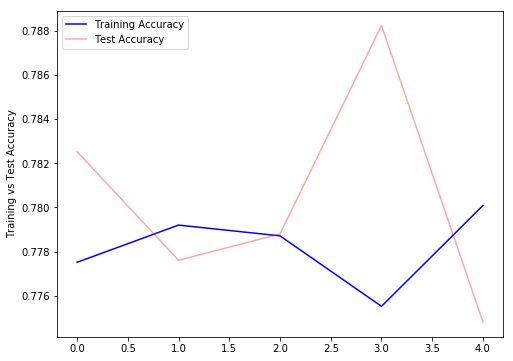

In [26]:
# Considering k-fold cross validation of 10

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

training_accuracy = []
test_accuracy = []
accuracy_difference = []

X = data.iloc[:, 1:24].values
print('X: ', type(X), X.shape)
y = data.iloc[:, 24].values
print('y: ', type(y), y.shape)

n_splits = 5

# loop over multiple trials
for i in range(0, n_splits):
    #split for this iteration, using shuffle and a different random_state 
    # for every iteration
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=i)
    
    clf = LogisticRegression(solver='liblinear')
    
    # fit on the training set
    clf.fit(Xtrain, ytrain)
    
    # predict on training set
    y_predict_training = clf.predict(Xtrain)
    
    # predict on test set
    y_predict_test = clf.predict(Xtest)
    
        # save training accuracy for this split
    tr_accuracy = accuracy_score(y_predict_training, ytrain)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for this split
    tst_accuracy = accuracy_score(y_predict_test, ytest)
    test_accuracy.append(tst_accuracy)
    
    # save difference
    accuracy_difference.append(tst_accuracy - tr_accuracy)
    

#Plot of training vs test accuracy 
#This gives a visualization of how large the difference between these two accuracies is
#If there is overfitting or underfitting 
training_plot, = plt.plot(training_accuracy, 'b')
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

### Observations from above
- As the k-fold value increases, the test accuracy was dropping and at some point where k-fold=3, it increased to an accuracy score of 0.788 there by making the model more accurate at that point.
- After this increase, the accuracy dropped and kept fluctating below the later.

X:  <class 'numpy.ndarray'> (30000, 23)
y:  <class 'numpy.ndarray'> (30000,)


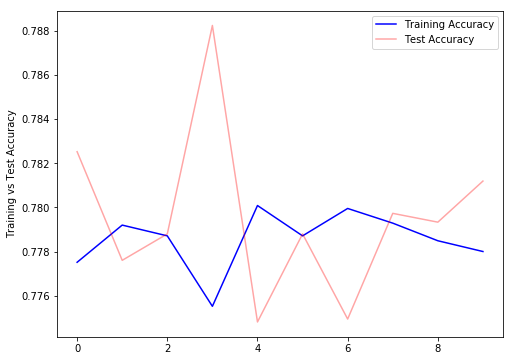

In [27]:
# Considering k-folds value of 20 

training_accuracy = []
test_accuracy = []
accuracy_difference = []

X = data.iloc[:, 1:24].values
print('X: ', type(X), X.shape)
y = data.iloc[:, 24].values
print('y: ', type(y), y.shape)

n_splits = 10

# loop over multiple trials
for i in range(0, n_splits):
    #split for this iteration, using shuffle and a different random_state 
    # for every iteration
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=i)
    
    clf = LogisticRegression(solver='liblinear')
    
    # fit on the training set
    clf.fit(Xtrain, ytrain)
    
    # predict on training set
    y_predict_training = clf.predict(Xtrain)
    
    # predict on test set
    y_predict_test = clf.predict(Xtest)
    
        # save training accuracy for this split
    tr_accuracy = accuracy_score(y_predict_training, ytrain)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for this split
    tst_accuracy = accuracy_score(y_predict_test, ytest)
    test_accuracy.append(tst_accuracy)
    
    # save difference
    accuracy_difference.append(tst_accuracy - tr_accuracy)
    

#Plot of training vs test accuracy 
#This gives a visualization of how large the difference between these two accuracies is
#If there is overfitting or underfitting 
training_plot, = plt.plot(training_accuracy, 'b')
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

### Observations from above.
- Since the k-fold values doesn't produce any higher values than 0.788 when the k-fold value is 3. To therefore reduce execution time and memory when doing computations with this model, k-fold value of 5 will therefore be the best for this case.
